<a href="https://www.kaggle.com/code/aathirasanthosh/kardashians-google-trends-eda?scriptVersionId=120028989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Keeping up with the Kardashians
In this project, I will be using search interest data from Google Trends to conduct an exploratory data analysis on the most famous family in reality television history - the Kardashians! Let's investigate which of these sisters is the most famous one.

Here's a look at their very complicated family tree:

![kardashian-family-tree](https://pagesix.com/wp-content/uploads/sites/3/2021/01/Kardashian-FamilyTree-v2.jpg?quality=75&strip=all&w=1324)

For the purpose of this analysis, we will only be focusing on the 5 daughters of Kris Jenner: Kim, Kourtney, Khloe, Kendall and Kylie. Out of the 5, Kim, Kourtney and Khloe are the daughters of Kris Jenner from her first marriage to Robert Kardashian, while Kylie and Kendall are the daughters from her second marriage to Caitlyn Jenner (formerly known as Bruce Jenner). I will be using worldwide search data on each of these sisters from 2007 (the year Kim became "active" according to Wikipedia) to Present (Feb 2023) for this analysis.

Let's start with inspecting the data downloaded from Google Trends in csv format.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Read in dataset
trends = pd.read_csv('/kaggle/input/kardashians-googletrends/kardashians_googletrends.csv')

# Inspect data
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,3,<1,<1,<1,1
1,2007-02,12,<1,<1,<1,1
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,1


Google defines the search interest values as:

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

We shall start with some basic data cleaning to make the data easier to work with for our exploratory data analysis. Let's first rename and shorten the column names

In [2]:
# Make column names easier to work with
trends.columns = ['month', 'kim', 'khloe', 'kourtney', 'kendall', 'kylie']

Next, we shall inspect the column data types

In [3]:
# Inspect data types
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     194 non-null    object
 1   kim       194 non-null    int64 
 2   khloe     194 non-null    object
 3   kourtney  194 non-null    object
 4   kendall   194 non-null    object
 5   kylie     194 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.2+ KB


We see that none of the columns have missing values. However, only the 'kim' column is an integer data type. We will need to convert the other sisters' columns into integer types as well. These columns also contain "<" character for some rows, which we will need to replace with blank spaces before doing the integer conversion. Additionally, we shall convert the month column into datetime so that we can conduct some time series data exploration.

In [4]:
# Loop through columns
for column in trends.columns:
    if "<" in trends[column].to_string():
        trends[column] = trends[column].str.replace("<", "")
        trends[column] = pd.to_numeric(trends[column])

In [5]:
# Convert month to type datetime
trends['month'] = pd.to_datetime(trends['month'])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     194 non-null    datetime64[ns]
 1   kim       194 non-null    int64         
 2   khloe     194 non-null    int64         
 3   kourtney  194 non-null    int64         
 4   kendall   194 non-null    int64         
 5   kylie     194 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.2 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,3,1,1,1,1
1,2007-02-01,12,1,1,1,1
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,1


Lastly, we shall set the month column as the index for the dataframe.

In [6]:
# Set month as DataFrame index
trends = trends.set_index('month')

# Inspect the data
trends.head()

,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,3,1,1,1,1
2007-02-01,12,1,1,1,1
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,1


Now that all the data has been cleaned, we shall first look at the Google search interest for all 5 sisters over our time frame.

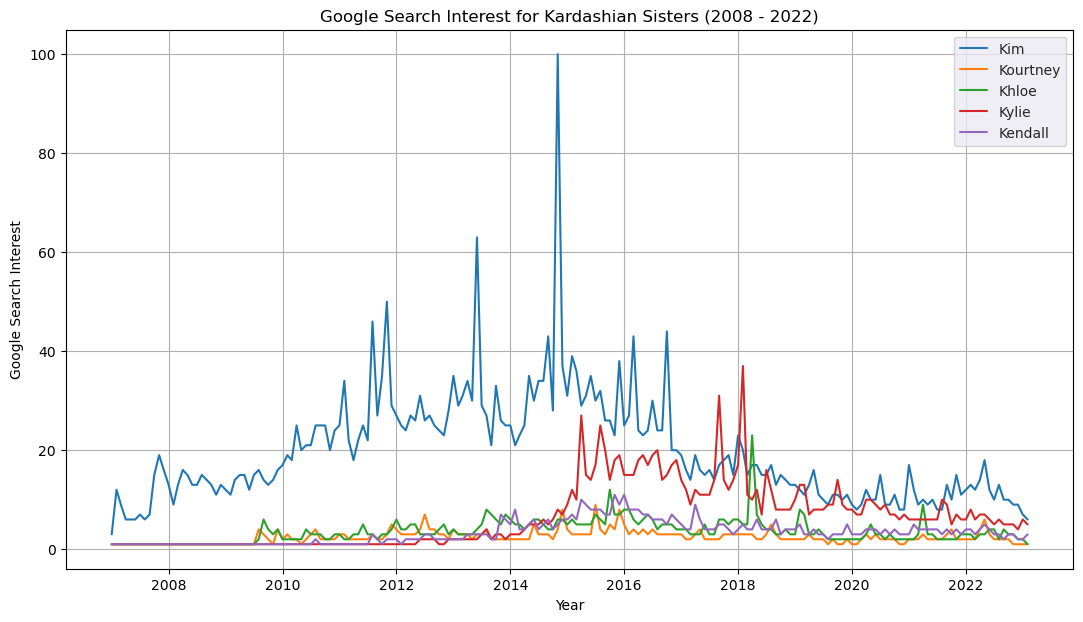

In [7]:
# Plot search interest vs. month
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Google Search Interest for Kardashian Sisters (2008 - 2022)')
plt.xlabel("Year")
plt.ylabel("Google Search Interest")
sns.set_style("dark")
sns.lineplot(data=trends, x="month", y="kim", legend='brief', label = 'Kim')
sns.lineplot(data=trends, x="month", y="kourtney", legend='brief', label = "Kourtney")
sns.lineplot(data=trends, x="month", y="khloe", legend='brief', label = "Khloe")
sns.lineplot(data=trends, x="month", y="kylie", legend='brief', label = "Kylie")
sns.lineplot(data=trends, x="month", y="kendall", legend='brief', label = "Kendall")
plt.grid()
plt.show()

Some interesting observations to note:

* Kim Kardashian has been trending since 2007, with the start of her reality show *Keeping Up With the Kardashians* among other things. 

* Over the series of the next 10 years, she rose to fame by launching several products such as workout DVDs, perfumes, clothing stores, music videos, joining Instagram, launching her own mobile game, emoji pack, beauty products etc. 

* The large spike in her search interest in 2013 could be attributed to the birth of her first child, North West with rapper Kanye West, in June 2013 while the largest spike in December 2014 could be a result of her "break the internet" magazine cover which led to a lot of trending news, radio and TV stories, tweets, memes etc. 

* There has been no significant search interest for the other sisters until 2009 when Kourtney and Khloe launched their reality TV series *Kourtney and Khloe Take Miami*. 

* Kourtney, who Kim has labelled as the "least interesting to look at" appears to have the lowest search interest out of all 5 sisters.

* The Jenner sisters being younger, only appeared to have started generating search interest from 2011 onwards. 

However, Kim Kardashian's search interests appears to be at a steady decline since 2017. Let's zoom a bit more into this graph, looking only at data from January 2014 onwards.

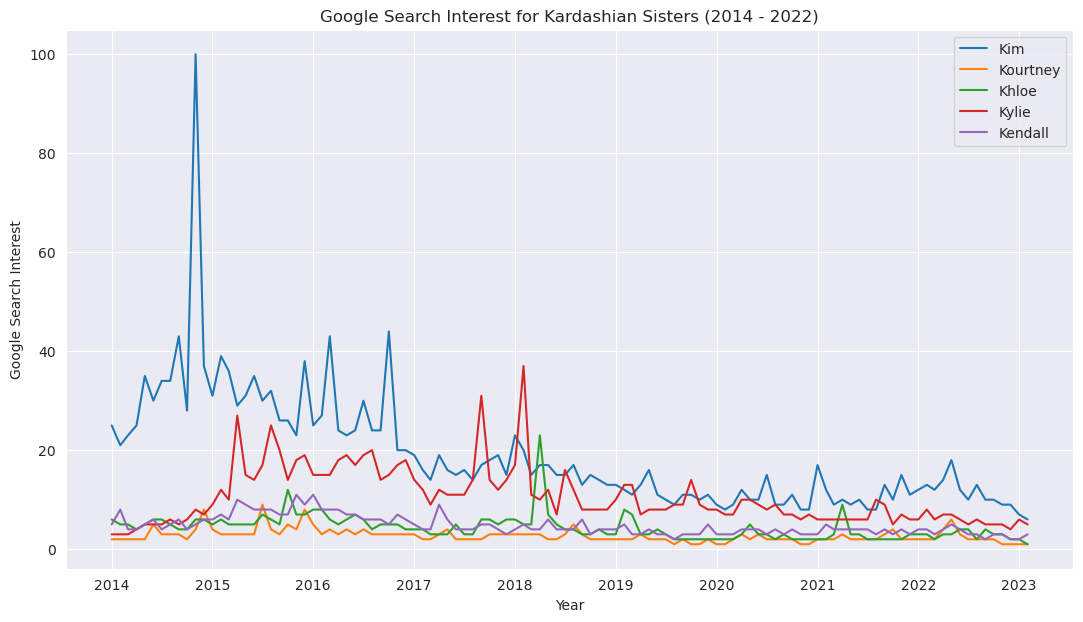

In [8]:
# Zoom in from January 2014
temp = trends.loc['2014-01-01':]
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Google Search Interest for Kardashian Sisters (2014 - 2022)')
plt.xlabel("Year")
plt.ylabel("Google Search Interest")
sns.set_style("dark")
sns.lineplot(data=temp, x="month", y="kim", legend='brief', label = 'Kim')
sns.lineplot(data=temp, x="month", y="kourtney", legend='brief', label = "Kourtney")
sns.lineplot(data=temp, x="month", y="khloe", legend='brief', label = "Khloe")
sns.lineplot(data=temp, x="month", y="kylie", legend='brief', label = "Kylie")
sns.lineplot(data=temp, x="month", y="kendall", legend='brief', label = "Kendall")
plt.grid()
plt.show()

* We observe a spike in Khloe's search history in 2019 and this could be due to the news regarding her split with her partner at the time, Tristan Thompson and his cheating scandal with her sister Kylie's ex-bestfriend, Jordyn Woods.

* In 2015, Kylie Jenner received well over a billion likes and 46.4 million followers on Instagram, and also launched her popular cosmetic company, Kylie Cosmetics which could explain the sudden spike in her search interest. We also observe spikes in her search interests in 2017 and 2018, where she even surpassed Kim's search interests. Two events could explain these spikes: the birth of her daughter Stormi Webster with partner Travis Scott in February 2018 and being named the youngest self-made billionaire by Forbes magazine in 2018.

Let's use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. We shall use a 12 month rolling window for this.

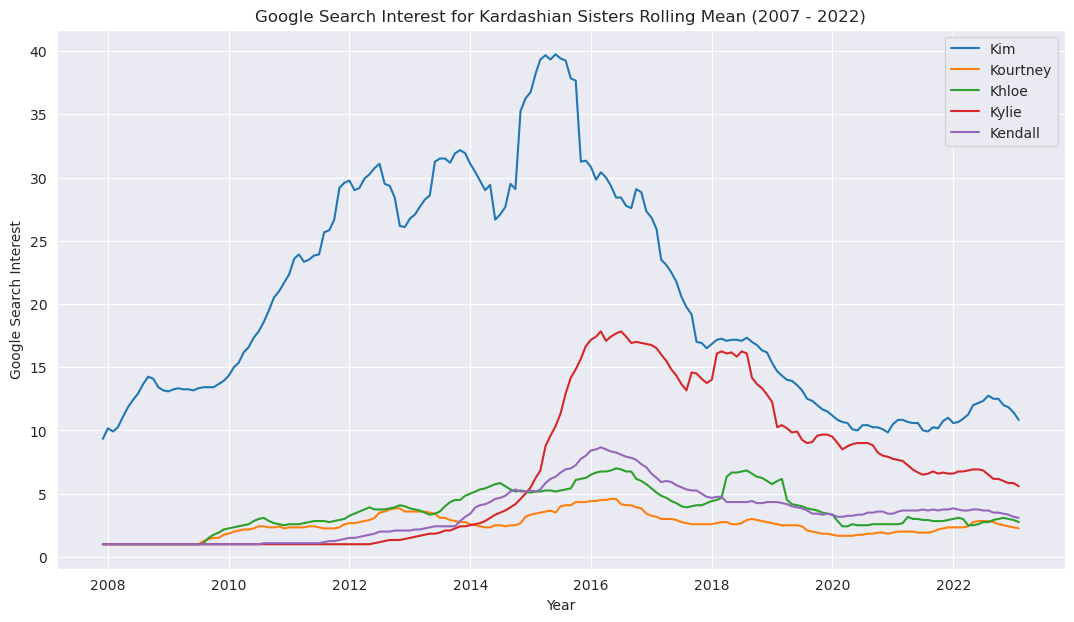

In [9]:
# Smooth the data with rolling means
rolling = trends.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Google Search Interest for Kardashian Sisters Rolling Mean (2007 - 2022)')
plt.xlabel("Year")
plt.ylabel("Google Search Interest")
sns.set_style("dark")
sns.lineplot(data=rolling, x="month", y="kim", legend='brief', label = 'Kim')
sns.lineplot(data=rolling, x="month", y="kourtney", legend='brief', label = "Kourtney")
sns.lineplot(data=rolling, x="month", y="khloe", legend='brief', label = "Khloe")
sns.lineplot(data=rolling, x="month", y="kylie", legend='brief', label = "Kylie")
sns.lineplot(data=rolling, x="month", y="kendall", legend='brief', label = "Kendall")
plt.grid()
plt.show()

We observe that once the data has been smoothed using rolling means, Kim is the most popular sister, with Kylie coming in as a close second from 2018 onwards.

We shall end this analysis with one last plot where we average the search interest for the 3 Kardashian sisters and compare them to the 2 Jenner sisters to see which family line is more popular.

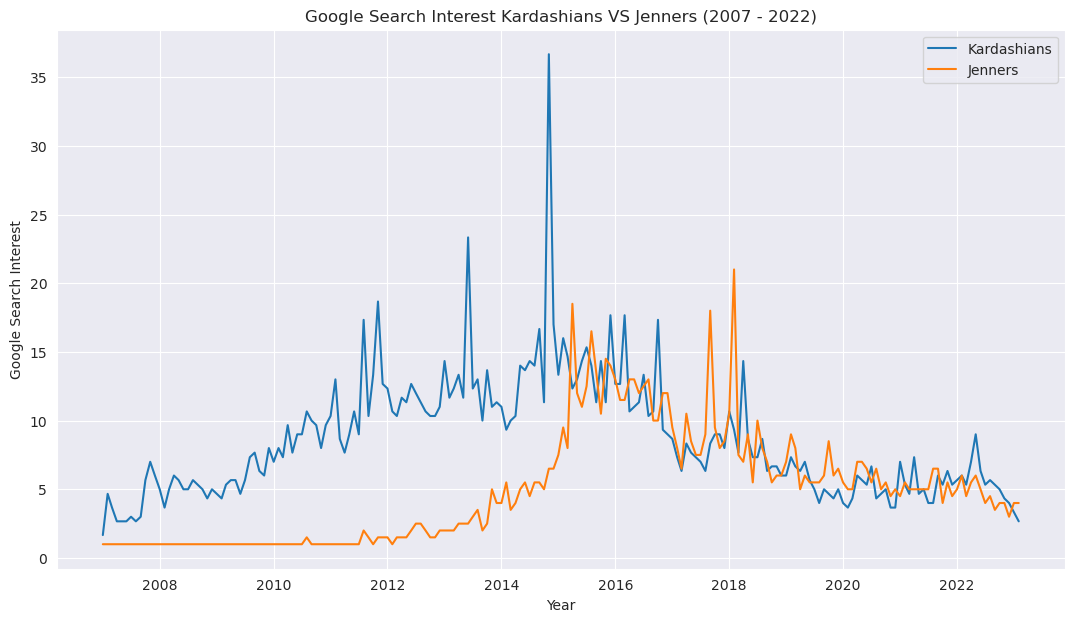

In [10]:
# Average search interest for each family line
trends['kardashian'] = (trends.kim + trends.khloe + trends.kourtney) / 3
trends['jenner'] = (trends.kendall + trends.kylie) / 2

# Plot average family line search interest vs. month
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Google Search Interest Kardashians VS Jenners (2007 - 2022)')
plt.xlabel("Year")
plt.ylabel("Google Search Interest")
sns.set_style("dark")

sns.lineplot(data=trends, x="month", y="kardashian", legend='brief', label = 'Kardashians')
sns.lineplot(data=trends, x="month", y="jenner", legend='brief', label = "Jenners")
plt.grid()
plt.show()

The Kardashians appear to be the more popular family line up until 2015. From 2015 onwards, the Jenners started gaining more popularity, and even surpassed the Kardashians in search interest in 2017 and 2018. However, in the more recent years, both family lines appear to be equally popular, and with this family's penchant for big events and scandals, it's hard to tell which sister will come out on top as being the most popular one!